In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


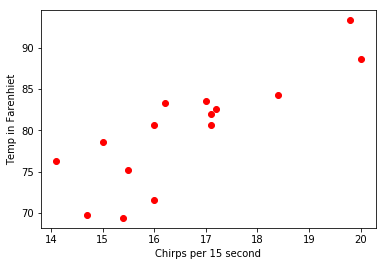

In [31]:
%matplotlib inline

#get x and y data
x_data , y_data = (df["Chirps"].values,df["Temp"].values)

#plot the data points
plt.plot(x_data,y_data,'ro')

plt.xlabel("Chirps per 15 second")
plt.ylabel("Temp in Farenhiet")

In [32]:
#Create place holders and Variables along with the linear model

X = tf.placeholder(tf.float32, shape = (x_data.size))
Y = tf.placeholder(tf.float32, shape = (y_data.size)) 

m = tf.Variable(3.0)
c = tf.Variable(2.0)

#We can calculate the predicted Y
Y_predict = tf.add(tf.multiply(X, m), c)

In [33]:
session = tf.Session()
session.run(tf.global_variables_initializer())

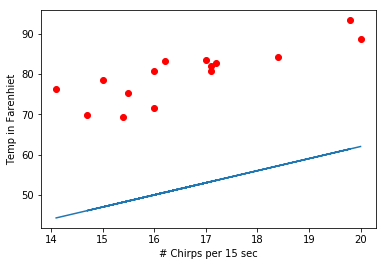

In [34]:
pred = session.run(Y_predict,feed_dict={X:x_data})
plt.plot(x_data, pred) #pred will return the value of Y_predict
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

### Define a  Graph for Loss Function

The essence of estimating the values for "m" and "c" lies in minimizing the difference between predicted "Ypred" and actual "Y" temperature values which is defined in the form of Mean Squared error loss function. 
      
$$ loss = \frac{1}{n}\sum_{i=1}^n{[Ypred_i - {Y}_i]^2} $$

Note: There are also other ways to model the loss function based on distance metric between predicted and actual temperature values. For this exercise Mean Suared error criteria is considered. 

In [35]:
nf = 1e-1
loss = tf.reduce_mean(tf.squared_difference(Y_predict*nf,Y*nf))

### Define an Optimization Graph to Minimize the Loss and Training the Model

In [36]:
#Now we will minimize the loss and train the model

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

#pass the loss function that optimizer should optimize on 

train  = optimizer.minimize(loss)

In [37]:
#Initialize all the variables again
session.run(tf.global_variables_initializer())

In [38]:
convergenceTolerance = 0.0001
pre_m = np.inf
pre_c = np.inf

steps = {}
steps['m'] = []
steps['c'] = []

losses = []
for k in range(100000):
    _,_m,_c,_l = session.run([train,m,c,loss],feed_dict={X:x_data,Y:y_data})
    steps['m'].append(_m)
    steps['c'].append(_c)
    losses.append(_l)
    if(np.abs(pre_m - _m) or np.abs(pre_c - _c)) <= convergenceTolerance:
        print ("Finish!")
        print (k)
        print (_l)
        break
    pre_m = _m
    pre_c = _c
session.close()

Finish!
119
0.183721


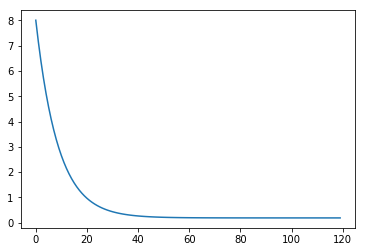

In [40]:
plt.plot(losses[:])